In [1]:
# Import all necessary libraries.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.metrics import accuracy_score 
from IPython.display import Image  
from six import StringIO  
import pydot
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [2]:
seed = 42
np.random.seed(seed)

In [3]:
# Definition of utility functions.
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=14)
        plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

### Iris dataset

É um conjunto de dados que contém o **comprimento** e a **largura** das sépalas e pétalas de 150 flores de íris de três espécies diferentes: Iris-Setosa, Iris-Versicolor e Iris-Virginica.

In [4]:
# Load the Iris dataset.
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

### max_depth=2

`max_depth`: a profundidade máxima da árvore. 

Se `None`, valor padrão, os nós são expandidos até que todas as folhas sejam **puras** ou até que todas as folhas contenham **menos** do que `min_samples_split` amostras.

In [5]:
# Instantiate and train the classifier.
# max_depth: The maximum depth of the tree. If None, then nodes are expanded 
# until all leaves are pure or until all leaves contain less than 
# min_samples_split samples.
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=42)
tree_clf.fit(X, y)

y_pred = tree_clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print('accuracy: ', accuracy)

accuracy:  0.96


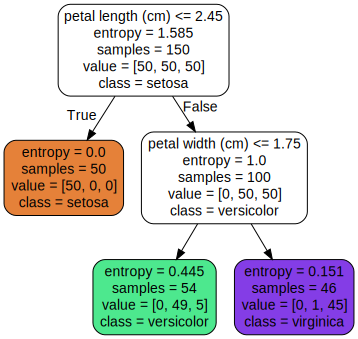

In [6]:
dot_data = export_graphviz(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

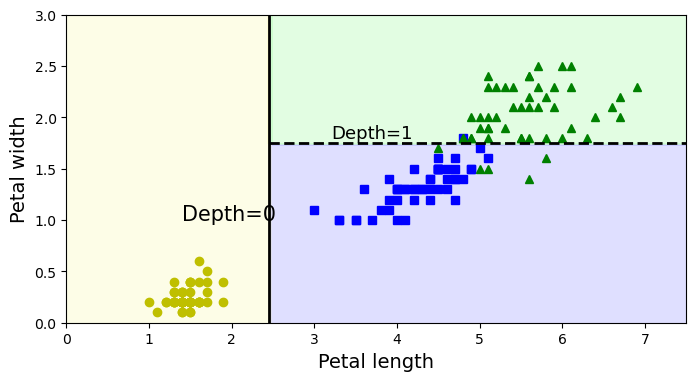

In [7]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)

plt.show()

+ A linha vertical grossa representa a fronteira de decisão do nó raiz (profundidade 0): comprimento da pétala = 2,45 cm. Como a área esquerda é pura (contém apenas exemplos de Iris-Setosa), ela não pode ser mais dividida. 


+ No entanto, a área da direita não contém amostras de apenas uma classe, ou seja, não é pura, então o nó da direita (de profundidade 1) divide-a com a largura da pétala = 1,75 cm (representada pela linha tracejada). 


+ Como `max_depth` foi definido como 2, a árvore de decisão para por aí. 


+ Porém, se definirmos `max_depth` como 3, então os dois novos nós, de profundidade 2, adicionarão cada uma outra fronteira de decisão (representadas pelas linhas pontilhadas no exemplo a seguir).

### max_depth=3

In [8]:
# Instantiate and train the classifier.
# max_depth: The maximum depth of the tree. If None, then nodes are expanded 
# until all leaves are pure or until all leaves contain less than 
# min_samples_split samples.
tree_clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=seed)
tree_clf.fit(X, y)

y_pred = tree_clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print('accuracy: ', accuracy)

accuracy:  0.9733333333333334


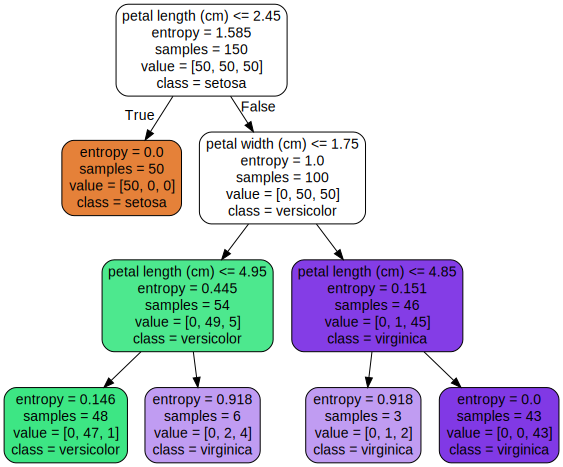

In [9]:
dot_data = export_graphviz(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

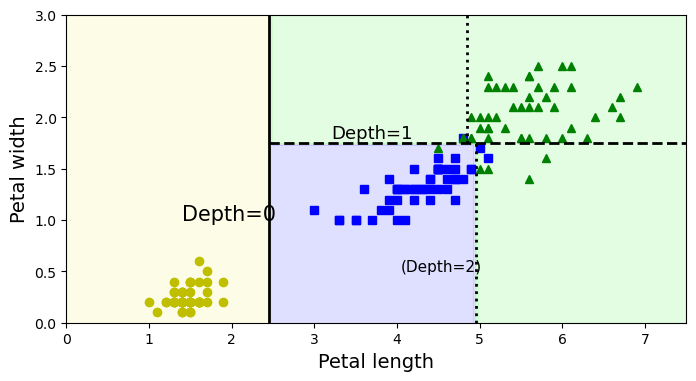

In [10]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

### Alterando a semente aleatória.

Alterando de 42 para 40.

In [11]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=40)
tree_clf_tweaked.fit(X, y)

y_pred = tree_clf_tweaked.predict(X)
accuracy = accuracy_score(y, y_pred)
print('accuracy: ', accuracy)

accuracy:  0.96


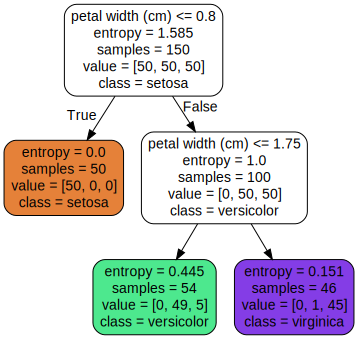

In [12]:
dot_data = export_graphviz(tree_clf_tweaked, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

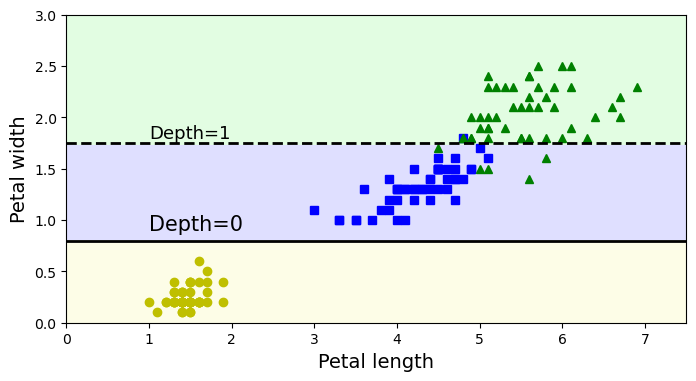

In [13]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

#### Observações

+ Em geral, o principal problema das árvores de decisão é que elas são **muito sensíveis a pequenas variações nos dados de treinamento**. 


+ Na verdade, como o algoritmo de treinamento usado pela biblioteca Scikit-Learn (i.e., CART) é estocástico, é possível obter-se soluções muito diferentes com o mesmo modelo e conjunto de treinamento (a menos que você defina o hiperparâmetro `random_state` com um valor constante). 


+ As **florestas aleatórias** podem limitar essa instabilidade calculando a média das predições feitas por diversas árvores de decisão.

### Árvore ilimitada

A árvore só para de "crescer" quando todos as folhas são puras (i.e., entropia igual a 0) ou que uma folha contenha menos do que `min_samples_split` amostras.

In [14]:
# Instantiate and train the classifier.
tree_clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

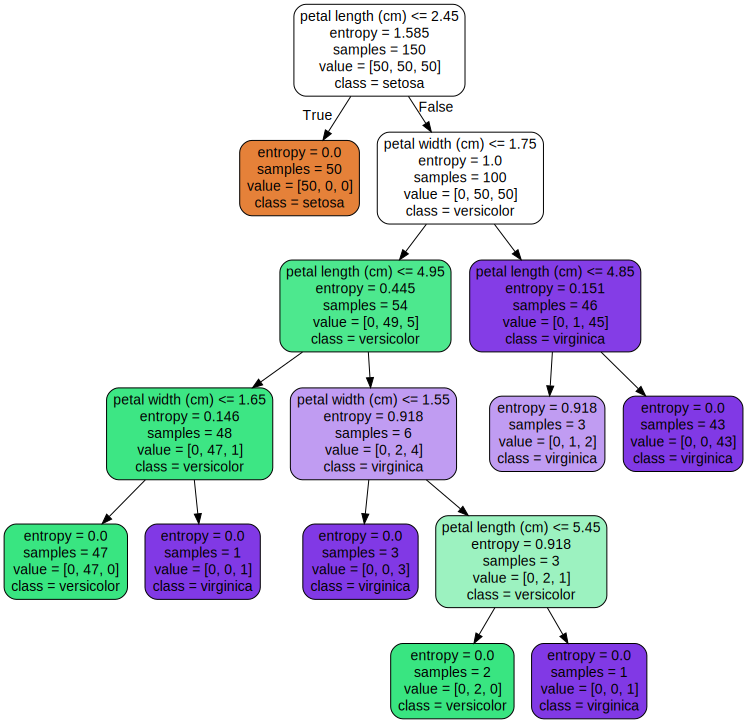

In [15]:
dot_data = export_graphviz(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

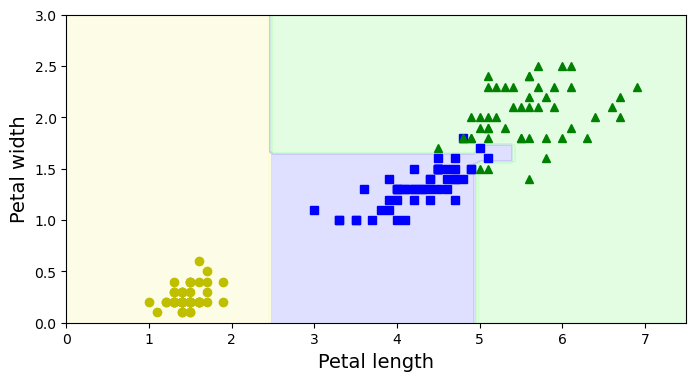

In [16]:
# Plot the decision boundaies.
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.show()

In [17]:
# Use the trained classifier to predict labels for the test features.
y_pred = tree_clf.predict(X)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y, y_pred)

print('accuracy: ', accuracy)

accuracy:  0.9933333333333333


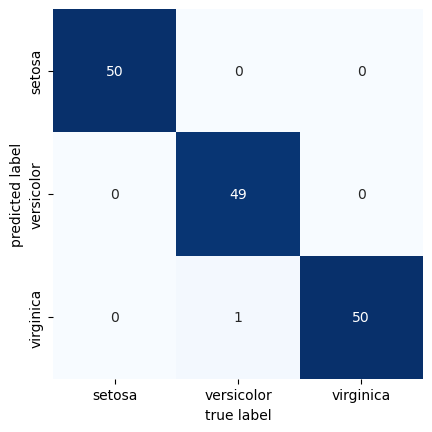

In [18]:
# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('confusion_matrix_bc.png', dpi=600)
plt.show()